In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import brewer2mpl
import json
import sys
from scipy.spatial.distance import cdist
from scipy.spatial.distance import euclidean

%matplotlib inline

In [2]:
bmap = brewer2mpl.get_map("Set2", "qualitative", 7)
colors = bmap.colors
Lcolors = colors[0:6]

for i in range(6):
    color = [i/255. for i in Lcolors[i]]
    Lcolors[i] = color

In [3]:
def HausdorffScore(cfs1, cfs2):
    """
    compute the modified Hausdorff score for measuring the consistency between two sets of counterfactual explanations.
    Arguments:
        cfs1: the first set of counterfactual explanations.
        cfs2: the second set of counterfactual explanations.
    returns:
        modified Hausdorff distance between two sets.
    """
    cfs1, cfs2 = np.array(cfs1), np.array(cfs2)
    pairwise_distance = cdist(cfs1, cfs2)
    h_A_B = pairwise_distance.min(1).mean()
    h_B_A = pairwise_distance.min(0).mean()

    return max(h_A_B, h_B_A)

def percent_range(dataset, _min=0.0, _max=1.0):
    data_sorted = np.sort(dataset)
    min_idx = int(_min * data_sorted.shape[0])
    max_idx = int(_max * data_sorted.shape[0])
    new_data = data_sorted[min_idx:max_idx]
    if new_data.shape[0] == 0:
        new_data = dataset
    return new_data


def stat(filename):
    with open(filename, 'r') as f:
        data = json.load(f)

    distance = []
    proximity = []
    sparsity = []
    aps = []

    cfs = data['cf']

    diversity_lists = np.array(data['diversity'])
    diversity_lists = diversity_lists[diversity_lists != -1]

    diversity2_lists = np.array(data['diversity2'])
    diversity2_lists = diversity2_lists[diversity2_lists != -1]

    count_diversity_lists = np.array(data['count_diversity'])
    count_diversity_lists = count_diversity_lists[count_diversity_lists != -1]

    count_diversity2_lists = np.array(data['count_diversity2'])
    count_diversity2_lists = count_diversity2_lists[count_diversity2_lists != -1]

    print(f'div: {len(diversity_lists)} | div2: {len(diversity2_lists)}')
    for i in range(len(cfs)):
        cf_list = cfs[i]
        cf_data_list = []
        cf2_data_list = []
        for j in range(len(cf_list)):
            cf = cf_list[j]
            cf_data_list.extend(cf['cf'])
            cf2_data_list.extend(cf['cf2'])
            proximity.append(cf['proximity'])
            sparsity.append(cf['sparsity'])
            aps.append(cf['aps'])

        if len(cf_list) > 0:
            distance.append(HausdorffScore(cf_data_list, cf2_data_list))
    if len(diversity_lists) == 0:
        diversity_lists = [0.0]
    if len(diversity2_lists) == 0:
        diversity2_lists = [0.0]
    if len(count_diversity_lists) == 0:
        count_diversity_lists = [0.0]
    if len(count_diversity2_lists) == 0:
        count_diversity2_lists = [0.0]

    distance = percent_range(distance)
    proximity = percent_range(proximity)
    sparsity = percent_range(sparsity)
    aps = percent_range(aps)
    diversity_lists = percent_range(diversity_lists)
    diversity2_lists = percent_range(diversity2_lists)
    count_diversity_lists = percent_range(count_diversity_lists)
    count_diversity2_lists = percent_range(count_diversity2_lists)

    return distance, proximity, sparsity, aps, diversity_lists, diversity2_lists, count_diversity_lists, count_diversity2_lists


def stat_cemsp(filename):
    with open(filename, 'r') as f:
        data = json.load(f)

    distance = []
    proximity = []
    sparsity = []
    aps = []

    num = data['num']
    cfs = data['cf']
    cf2 = data['cf2']

    diversity_lists = np.array(data['diversity'])
    diversity_lists = diversity_lists[diversity_lists != -1]

    diversity2_lists = np.array(data['diversity2'])
    diversity2_lists = diversity2_lists[diversity2_lists != -1]

    count_diversity_lists = np.array(data['count_diversity'])
    count_diversity_lists = count_diversity_lists[count_diversity_lists != -1]

    count_diversity2_lists = np.array(data['count_diversity2'])
    count_diversity2_lists = count_diversity2_lists[count_diversity2_lists != -1]

    print(f'div: {len(diversity_lists)} | div2: {len(diversity2_lists)}')

    for i in range(len(cfs)):
        cf_list = cfs[i]
        cf_data_list = []
        for j in range(num[i]):
            cf = cf_list[j]
            cf_data_list.extend(cf['cf'])
            proximity.append(cf['proximity'])
            sparsity.append(cf['sparsity'])
            aps.append(cf['aps'])
        cf2_data_list = cf2[i]

        if len(cf_data_list) > 0 and len(cf2_data_list) > 0:
            distance.append(HausdorffScore(cf_data_list, cf2_data_list))

    if len(diversity_lists) == 0:
        diversity_lists = [0.0]
    if len(diversity2_lists) == 0:
        diversity2_lists = [0.0]
    if len(count_diversity_lists) == 0:
        count_diversity_lists = [0.0]
    if len(count_diversity2_lists) == 0:
        count_diversity2_lists = [0.0]

    distance = percent_range(distance)
    proximity = percent_range(proximity)
    sparsity = percent_range(sparsity)
    aps = percent_range(aps)
    diversity_lists = percent_range(diversity_lists)
    diversity2_lists = percent_range(diversity2_lists)
    count_diversity_lists = percent_range(count_diversity_lists)
    count_diversity2_lists = percent_range(count_diversity2_lists)

    return distance, proximity, sparsity, aps, diversity_lists, diversity2_lists, count_diversity_lists, count_diversity2_lists

In [4]:
synthetic_gs = "../cfgen-update/synthetic/synthetic_growingsphere.json"
synthetic_cfproto = "../cfgen-update/synthetic/synthetic_cfproto1.json"
synthetic_plaincf = "../cfgen-update/synthetic/synthetic_plaincf.json"
synthetic_dice = "../cfgen-update/synthetic/synthetic_dice.json"
synthetic_sns = "../consistency/code/synthetic_sns_update.json"
synthetic_cemsp = "../cfgen-update/synthetic/synthetic_cemsp.json"

syn_distance_gs, syn_proximity_gs, syn_sparsity_gs, syn_aps_gs, syn_div_gs, syn_div2_gs, syn_cdiv_gs, syn_cdiv2_gs = stat(synthetic_gs)
syn_distance_cfproto, syn_proximity_cfproto, syn_sparsity_cfproto, syn_aps_cfproto, syn_div_cfproto, syn_div2_cfproto, syn_cdiv_cfproto, syn_cdiv2_cfproto = stat(synthetic_cfproto)
syn_distance_plaincf, syn_proximity_plaincf, syn_sparsity_plaincf, syn_aps_plaincf, syn_div_plaincf, syn_div2_plaincf, syn_cdiv_plaincf, syn_cdiv2_plaincf = stat(synthetic_plaincf)
syn_distance_dice, syn_proximity_dice, syn_sparsity_dice, syn_aps_dice, syn_div_dice, syn_div2_dice, syn_cdiv_dice, syn_cdiv2_dice = stat(synthetic_dice)
syn_distance_sns, syn_proximity_sns, syn_sparsity_sns, syn_aps_sns, syn_div_sns, syn_div2_sns, syn_cdiv_sns, syn_cdiv2_sns = stat(synthetic_sns)
syn_distance_cemsp, syn_proximity_cemsp, syn_sparsity_cemsp, syn_aps_cemsp, syn_div_cemsp, syn_div2_cemsp, syn_cdiv_cemsp, syn_cdiv2_cemsp = stat_cemsp(synthetic_cemsp)

div: 495 | div2: 495
div: 496 | div2: 496
div: 496 | div2: 496
div: 496 | div2: 496
div: 496 | div2: 496
div: 496 | div2: 501


In [5]:
thyroid_gs = "../cfgen-update/thyroid/thyroid_growingsphere.json"
thyroid_cfproto = "../cfgen-update/thyroid/Thyroid_cfproto.json"
thyroid_plaincf = "../cfgen-update/thyroid/thyroid_plaincf.json"
thyroid_dice = "../cfgen-update/thyroid/thyroid_dice.json"
thyroid_sns = "../consistency/code/thyroid_sns_update.json"
thyroid_cemsp = "../cfgen-update/thyroid/thyroid_cemsp.json"

thyroid_distance_gs, thyroid_proximity_gs, thyroid_sparsity_gs, thyroid_aps_gs, thyroid_div_gs, thyroid_div2_gs, thyroid_cdiv_gs, thyroid_cdiv2_gs = stat(thyroid_gs)
thyroid_distance_cfproto, thyroid_proximity_cfproto, thyroid_sparsity_cfproto, thyroid_aps_cfproto, thyroid_div_cfproto, thyroid_div2_cfproto, thyroid_cdiv_cfproto, thyroid_cdiv2_cfproto = stat(thyroid_cfproto)
thyroid_distance_plaincf, thyroid_proximity_plaincf, thyroid_sparsity_plaincf, thyroid_aps_plaincf, thyroid_div_plaincf, thyroid_div2_plaincf, thyroid_cdiv_plaincf, thyroid_cdiv2_plaincf = stat(thyroid_plaincf)
thyroid_distance_dice, thyroid_proximity_dice, thyroid_sparsity_dice, thyroid_aps_dice, thyroid_div_dice, thyroid_div2_dice, thyroid_cdiv_dice, thyroid_cdiv2_dice = stat(thyroid_dice)
thyroid_distance_sns, thyroid_proximity_sns, thyroid_sparsity_sns, thyroid_aps_sns, thyroid_div_sns, thyroid_div2_sns, thyroid_cdiv_sns, thyroid_cdiv2_sns = stat(thyroid_sns)
thyroid_distance_cemsp, thyroid_proximity_cemsp, thyroid_sparsity_cemsp, thyroid_aps_cemsp, thyroid_div_cemsp, thyroid_div2_cemsp, thyroid_cdiv_cemsp, thyroid_cdiv2_cemsp = stat_cemsp(thyroid_cemsp)

div: 0 | div2: 0
div: 0 | div2: 0
div: 0 | div2: 0
div: 0 | div2: 0
div: 0 | div2: 0
div: 0 | div2: 0


In [6]:
hepatitis_gs = "../cfgen-update/hepatitis/Hepatitis_growingsphere.json"
hepatitis_cfproto = "../cfgen-update/hepatitis/Hepatitis_cfproto.json"
hepatitis_plaincf = "../cfgen-update/hepatitis/Hepatitis_plaincf.json"
hepatitis_dice = "../cfgen-update/hepatitis/Hepatitis_dice.json"
hepatitis_sns = "../consistency/code/hepatitis_sns_update.json"
hepatitis_cemsp = "../cfgen-update/hepatitis/Hepatitis_cemsp.json"


hepatitis_distance_gs, hepatitis_proximity_gs, hepatitis_sparsity_gs, hepatitis_aps_gs, hepatitis_div_gs, hepatitis_div2_gs, hepatitis_cdiv_gs, hepatitis_cdiv2_gs = stat(hepatitis_gs)
hepatitis_distance_cfproto, hepatitis_proximity_cfproto, hepatitis_sparsity_cfproto, hepatitis_aps_cfproto, hepatitis_div_cfproto, hepatitis_div2_cfproto, hepatitis_cdiv_cfproto, hepatitis_cdiv2_cfproto = stat(hepatitis_cfproto)
hepatitis_distance_plaincf, hepatitis_proximity_plaincf, hepatitis_sparsity_plaincf, hepatitis_aps_plaincf, hepatitis_div_plaincf, hepatitis_div2_plaincf, hepatitis_cdiv_plaincf, hepatitis_cdiv2_plaincf = stat(hepatitis_plaincf)
hepatitis_distance_dice, hepatitis_proximity_dice, hepatitis_sparsity_dice, hepatitis_aps_dice, hepatitis_div_dice, hepatitis_div2_dice, hepatitis_cdiv_dice, hepatitis_cdiv2_dice = stat(hepatitis_dice)
hepatitis_distance_sns, hepatitis_proximity_sns, hepatitis_sparsity_sns, hepatitis_aps_sns, hepatitis_div_sns, hepatitis_div2_sns, hepatitis_cdiv_sns, hepatitis_cdiv2_sns = stat(hepatitis_sns)
hepatitis_distance_cemsp, hepatitis_proximity_cemsp, hepatitis_sparsity_cemsp, hepatitis_aps_cemsp, hepatitis_div_cemsp, hepatitis_div2_cemsp, hepatitis_cdiv_cemsp, hepatitis_cdiv2_cemsp = stat_cemsp(hepatitis_cemsp)

div: 13 | div2: 13
div: 14 | div2: 14
div: 14 | div2: 14
div: 14 | div2: 14
div: 13 | div2: 13
div: 14 | div2: 8


In [7]:
xaxis_label = ["GS", "PlainCF", "DiCE","CFProto", "SNS", "CEMSP"]
xtick = np.arange(1, 6 + 1)

In [8]:
def _print_min_max(array):
    for v in array:
        print(min(v), max(v))

_print_min_max([syn_div_gs, syn_div_plaincf, syn_div_dice,  syn_div_cfproto, syn_div_sns, syn_div_cemsp])

0.00018718324499999994 4.391691466396234
0.003160786353372913 4.878005641287611
1.9013193899510012 4.075738469921589
0.000325868300409482 4.791411828254656
0.015401165703451625 7.224842134039013
0.14239203410744317 3.9991740505047986


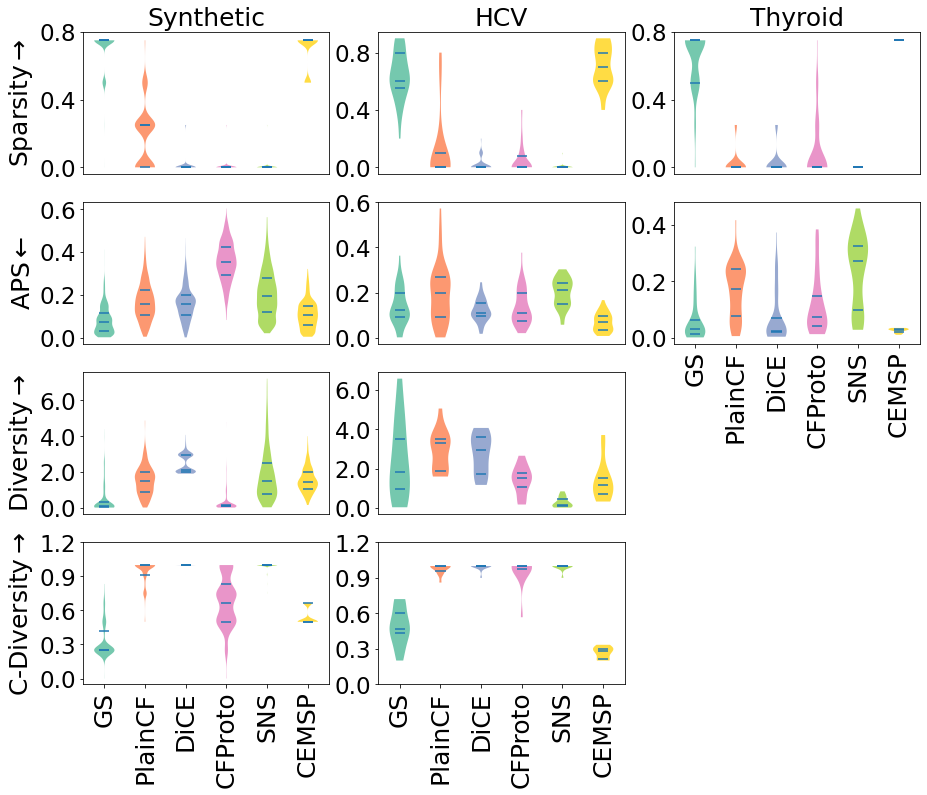

In [9]:
from matplotlib.ticker import FormatStrFormatter
fig, axs = plt.subplots(4, 3, figsize=(15, 12))
plt.rcParams['xtick.labelsize']= 20
plt.rcParams['ytick.labelsize']= 20

alpha = 0.9
fontsize = 25
yfontsize= 23

quantiles = [[0.25, 0.5, 0.75] for _ in range(6)]


parts_0_0 = axs[0, 0].violinplot([syn_sparsity_gs, syn_sparsity_plaincf, syn_sparsity_dice,  syn_sparsity_cfproto, syn_sparsity_sns, syn_sparsity_cemsp], quantiles=quantiles, showextrema=False)
parts_0_1 = axs[0, 1].violinplot([hepatitis_sparsity_gs, hepatitis_sparsity_plaincf, hepatitis_sparsity_dice,  hepatitis_sparsity_cfproto, hepatitis_sparsity_sns, hepatitis_sparsity_cemsp], quantiles=quantiles, showextrema=False)
parts_0_2 = axs[0, 2].violinplot([thyroid_sparsity_gs, thyroid_sparsity_plaincf, thyroid_sparsity_dice,  thyroid_sparsity_cfproto, thyroid_sparsity_sns, thyroid_sparsity_cemsp], quantiles=quantiles, showextrema=False)



parts_1_0 = axs[1, 0].violinplot([syn_aps_gs, syn_aps_plaincf, syn_aps_dice,  syn_aps_cfproto, syn_aps_sns, syn_aps_cemsp], quantiles=quantiles, showextrema=False)
parts_1_1 = axs[1, 1].violinplot([hepatitis_aps_gs, hepatitis_aps_plaincf, hepatitis_aps_dice,  hepatitis_aps_cfproto, hepatitis_aps_sns, hepatitis_aps_cemsp], quantiles=quantiles, showextrema=False)
parts_1_2 = axs[1, 2].violinplot([thyroid_aps_gs, thyroid_aps_plaincf, thyroid_aps_dice,  thyroid_aps_cfproto, thyroid_aps_sns, thyroid_aps_cemsp], quantiles=quantiles, showextrema=False)



parts_2_0 = axs[2, 0].violinplot([syn_div_gs, syn_div_plaincf, syn_div_dice,  syn_div_cfproto, syn_div_sns, syn_div_cemsp], quantiles=quantiles, showextrema=False)
parts_2_1 = axs[2, 1].violinplot([hepatitis_div_gs, hepatitis_div_plaincf, hepatitis_div_dice,  hepatitis_div_cfproto, hepatitis_div_sns, hepatitis_div_cemsp], quantiles=quantiles, showextrema=False)

parts_3_0 = axs[3, 0].violinplot([syn_cdiv_gs, syn_cdiv_plaincf, syn_cdiv_dice,  syn_cdiv_cfproto, syn_cdiv_sns, syn_cdiv_cemsp], quantiles=quantiles, showextrema=False)
parts_3_1 = axs[3, 1].violinplot([hepatitis_cdiv_gs, hepatitis_cdiv_plaincf, hepatitis_cdiv_dice,  hepatitis_cdiv_cfproto, hepatitis_cdiv_sns, hepatitis_cdiv_cemsp], quantiles=quantiles, showextrema=False)

# set violinplot style
parts = [parts_0_0, parts_0_1, parts_0_2, parts_1_0, parts_1_1, parts_1_2, parts_2_0, parts_2_1, parts_3_0, parts_3_1]

for part in parts:
    for idx, pc in enumerate(part['bodies']):
        pc.set_facecolor(Lcolors[idx])
        pc.set_alpha(alpha)


# Set Ylabel
axs[0,0].set_ylabel(r"Sparsity$\rightarrow$", fontsize = fontsize)
axs[1,0].set_ylabel(r"APS$\leftarrow$", fontsize = fontsize)
axs[2,0].set_ylabel(r"Diversity$\rightarrow$", fontsize = fontsize)
axs[3,0].set_ylabel(r"C-Diversity$\rightarrow$", fontsize = fontsize)

# Set Title
axs[0,0].set_title(r'Synthetic', fontsize = fontsize)
axs[0,1].set_title(r'HCV', fontsize = fontsize)
axs[0,2].set_title(r'Thyroid', fontsize = fontsize)


# Set X tick
axs[0, 0].set_xticks([])
axs[0, 1].set_xticks([])
axs[0, 2].set_xticks([])
axs[1, 0].set_xticks([])
axs[1, 1].set_xticks([])
axs[1, 2].set_xticks([])
axs[2, 0].set_xticks([])
axs[2, 1].set_xticks([])
axs[2, 2].set_xticks([])

axs[3,0].set_xticks(xtick)
axs[3,0].set_xticklabels(xaxis_label, fontsize = fontsize, rotation = 90)
axs[3,1].set_xticks(xtick)
axs[3,1].set_xticklabels(xaxis_label, fontsize = fontsize, rotation = 90)
axs[1,2].set_xticks(xtick)
axs[1,2].set_xticklabels(xaxis_label, fontsize = fontsize, rotation = 90)

# Set Y limit
axs[0,0].set_yticks(np.arange(0, 1.2, 0.4))
axs[0,1].set_yticks(np.arange(0, 1.2, 0.4))
axs[0,2].set_yticks(np.arange(0, 1.2, 0.4))


axs[1,0].set_yticks(np.arange(0, 0.61, 0.2))
axs[1,1].set_yticks(np.arange(0, 0.61, 0.2))
axs[1,2].set_yticks(np.arange(0, 0.6, 0.2))


axs[2,0].set_yticks(np.arange(0, 8.0, 2))
axs[2,1].set_yticks(np.arange(0, 8.0, 2))
axs[2,2].set_yticks([])


axs[3,0].set_yticks(np.arange(0, 1.21, 0.3))
axs[3,1].set_yticks(np.arange(0, 1.21, 0.3))
axs[3,2].set_yticks([])

for i in range(4):
    for j in range(3):
        axs[i, j].tick_params(axis='y', labelsize=yfontsize)

axs[0,0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[0,1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[0,2].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[1,0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[1,1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[1,2].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[2,0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[2,1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[2,2].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[3,0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[3,1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[3,2].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

axs[2, 2].set_visible(False)
axs[3, 2].set_visible(False)

# plt.tight_layout()
plt.savefig("setting1-violin-model-update-4x3.pdf", dpi = 1200, bbox_inches = 'tight')
plt.show()

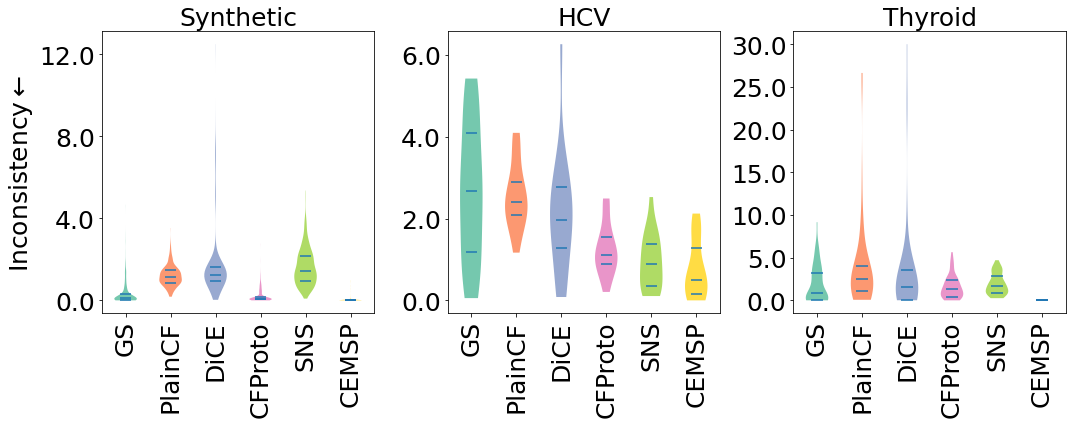

In [10]:
from matplotlib.ticker import FormatStrFormatter
fig, axs = plt.subplots(1, 3, figsize=(15, 6))
plt.rcParams['xtick.labelsize']= 20
plt.rcParams['ytick.labelsize']= 20
# plt.rcParams["figure.figsize"] = (15, 20)

alpha = 0.9
fontsize = 25

quantiles = [[0.25, 0.5, 0.75] for _ in range(6)]


parts_0_0 = axs[0].violinplot([syn_distance_gs, syn_distance_plaincf, syn_distance_dice,  syn_distance_cfproto, syn_distance_sns, syn_distance_cemsp], quantiles=quantiles, showextrema=False)
parts_0_1 = axs[1].violinplot([hepatitis_distance_gs, hepatitis_distance_plaincf, hepatitis_distance_dice,  hepatitis_distance_cfproto, hepatitis_distance_sns, hepatitis_distance_cemsp], quantiles=quantiles, showextrema=False)
parts_0_2 = axs[2].violinplot([thyroid_distance_gs, thyroid_distance_plaincf, thyroid_distance_dice,  thyroid_distance_cfproto, thyroid_distance_sns, thyroid_distance_cemsp], quantiles=quantiles, showextrema=False)


# set violinplot style
parts = [parts_0_0, parts_0_1, parts_0_2]

for part in parts:
    for idx, pc in enumerate(part['bodies']):
        pc.set_facecolor(Lcolors[idx])
        pc.set_alpha(alpha)


# Set Ylabel
axs[0].set_ylabel(r"Inconsistency$\leftarrow$", fontsize = fontsize)

# Set Title
axs[0].set_title(r'Synthetic', fontsize = fontsize)
axs[1].set_title(r'HCV', fontsize = fontsize)
axs[2].set_title(r'Thyroid', fontsize = fontsize)


# Set X tick
axs[0].set_xticks(xtick)
axs[0].set_xticklabels(xaxis_label, fontsize = fontsize, rotation = 90)
axs[1].set_xticks(xtick)
axs[1].set_xticklabels(xaxis_label, fontsize = fontsize, rotation = 90)
axs[2].set_xticks(xtick)
axs[2].set_xticklabels(xaxis_label, fontsize = fontsize, rotation = 90)

# Set Y limit
axs[0].set_yticks(np.arange(0, 12.1, 4), fontsize=fontsize)

axs[1].set_yticks(np.arange(0, 7, 2), fontsize=fontsize)
axs[2].set_yticks(np.arange(0, 30.1, 5), fontsize=fontsize)

for i in range(3):
    axs[i].tick_params(axis='y', labelsize=25)

axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[2].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.tight_layout()
plt.savefig("setting1-violin-model-update-1x3.pdf", dpi = 1200, bbox_inches = 'tight')
plt.show()